In [8]:
import matplotlib.pyplot as plt, json
import seaborn as sns, statistics
from figure_colors import named_colors
from matplotlib.lines import Line2D

In [9]:
# read json
with open('inference_pathology_unet_gpu_vram.json') as f:
    unet_results = json.load(f)
with open('inference_pathology_oct_gpu_vram.json') as f:
    oct_results = json.load(f)
with open('inference_pathology_m3d_gpu_vram.json') as f:
    m3d_results = json.load(f)
with open('test_segformer.json') as f:
    vit_results = json.load(f)
with open('test_transunet.json') as f:
    transunet_results = json.load(f)

oct_results = {int(k): v for k, v in oct_results.items()}
unet_results = {int(k): v for k, v in unet_results.items()}
vit_results = {int(k): v for k, v in vit_results.items()}
transunet_results = {int(k): v for k, v in transunet_results.items()}
m3d_results = {int(k): v for k, v in m3d_results.items()}

In [10]:
def mebibytes_to_megabytes(mb):
    byte = 1024 * 1024 * mb
    return byte / 1_000_000
def mebibytes_to_gigabytes(mb):
    byte = 1024 * 1024 * mb
    return byte / 1_000_000_000
def ones_to_millions(ones):
    return ones / 1_000_000

def mebibytes_to_gebibytes(mb):
    return mb / 1024

def gebibytes_to_gigabytes(gb):
    byte = 1024 * 1024 * 1024 * gb
    return byte / 1_000_000_000

In [11]:
oct_results = {ones_to_millions(k): mebibytes_to_gebibytes(statistics.mean(v)) for k, v in oct_results.items()}
unet_results = {ones_to_millions(k): mebibytes_to_gebibytes(statistics.mean(v)) for k, v in unet_results.items()}
vit_results = {ones_to_millions(k): mebibytes_to_gebibytes(statistics.mean(v)) for k, v in vit_results.items()}
transunet_results = {ones_to_millions(k): mebibytes_to_gebibytes(statistics.mean(v)) for k, v in transunet_results.items()}
m3d_results = {ones_to_millions(k): mebibytes_to_gebibytes(statistics.mean(v)) for k, v in m3d_results.items()}

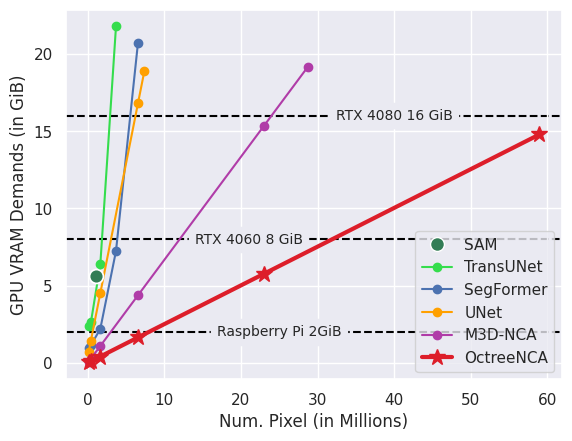

In [12]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
plt.plot(transunet_results.keys(), transunet_results.values(), label='TransUNet', marker='o', color=named_colors['TransUNet'], zorder=2)
plt.plot(vit_results.keys(), vit_results.values(), label='SegFormer', marker='o', zorder=2)
plt.plot(unet_results.keys(), unet_results.values(), label='UNet', marker='o', color=named_colors['UNet'], zorder=2)
plt.plot(m3d_results.keys(), m3d_results.values(), label='M3D-NCA', marker='o', color=named_colors['M3D-NCA'], zorder=2)
plt.plot(oct_results.keys(), oct_results.values(), label='OctreeNCA', marker='*', color=named_colors['OctreeNCA'], linewidth=3, markersize=12, zorder=2)
plt.xlabel("Num. Pixel (in Millions)")
plt.ylabel("GPU VRAM Demands (in GiB)")
ax.ticklabel_format(useOffset=False)
sam_scatter = scatter = ax.scatter(ones_to_millions(1024**2), mebibytes_to_gebibytes(5739.20), color=named_colors["SAM"], marker='o', s=100, edgecolor='white', linewidth=1.25)
#ax.annotate('SAM', (ones_to_millions(1024**2), mebibytes_to_gigabytes(5739.20)), textcoords="offset points", xytext=(40,40), ha='center',
#        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
#        arrowprops=dict(arrowstyle="->", color='black'))
scatter.zorder = 2

handles, labels = plt.gca().get_legend_handles_labels()
handles.insert(0, Line2D([0], [0], label='SAM', marker='o', markersize=10, 
         markeredgecolor='white', markerfacecolor=named_colors["SAM"], linestyle='')
)

plt.axhline(y=(2), color='black', linestyle='--').zorder = 0.5
plt.axhline(y=(16), color='black', linestyle='--').zorder = 0.5
plt.axhline(y=(8), color='black', linestyle='--').zorder = 0.5
plt.text(25,(2), "Raspberry Pi 2GiB", verticalalignment='center', horizontalalignment='center', fontsize=10, backgroundcolor=(234/255,234/255,242/255))
plt.text(40,(16), "RTX 4080 16 GiB", verticalalignment='center', horizontalalignment='center', fontsize=10, backgroundcolor=(234/255,234/255,242/255))
plt.text(21,(8), "RTX 4060 8 GiB", verticalalignment='center', horizontalalignment='center', fontsize=10, backgroundcolor=(234/255,234/255,242/255)).zorder = 1

plt.legend(handles=handles, loc="lower right")

plt.savefig('figures/gpu_vram.pdf', bbox_inches='tight')


In [13]:
print(oct_results)
print(unet_results)

{58.9824: 14.793467044830322, 23.04: 5.778232097625732, 6.5536: 1.6460061073303223, 1.6384: 0.41176843643188477, 0.4096: 0.10583353042602539, 0.1024: 0.026824474334716797}
{7.3984: 18.913607120513916, 6.5536: 16.801077842712402, 1.6384: 4.514700889587402, 0.4096: 1.4431066513061523, 0.1024: 0.6777253150939941}
